In [18]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
# read trend data 
trend = pd.read_csv(".././../data/Google_trends/all_trend.csv",index_col ='Maand',parse_dates = True)

In [20]:
trend

vegan
Maand            
2004-01-01      4
2004-02-01      0
2004-03-01      6
2004-04-01      0
2004-05-01      5
...           ...
2022-08-01     80
2022-09-01     72
2022-10-01     70
2022-11-01     73
2022-12-01     80

[228 rows x 1 columns]

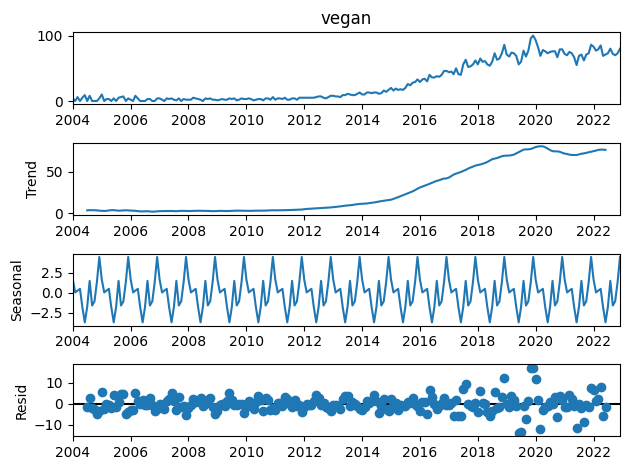

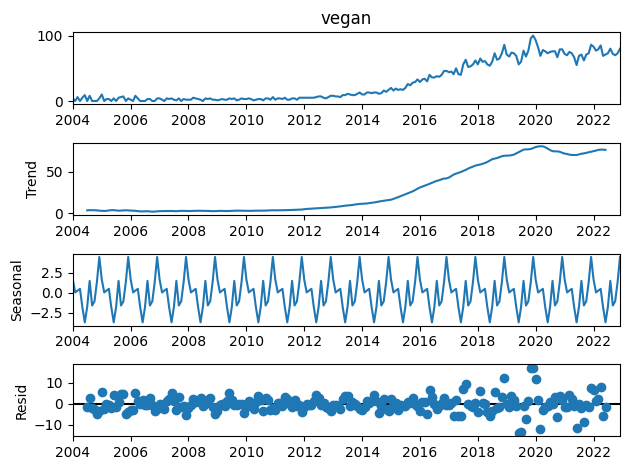

In [21]:
# ETS Decomposition
result = seasonal_decompose(trend['vegan'],period=None)
  
# ETS plot 
result.plot()

***ARIMA Model for Time Series Forecasting***
- ARIMA stands for autoregressive integrated moving average model and is specified by three order parameters: (p, d, q).

- AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.
- I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.
- MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal parameters for an ARIMA model and returns a fitted ARIMA model.

In [22]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(trend['vegan'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1259.587, Time=0.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1376.629, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1292.855, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1262.437, Time=0.14 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1335.220, Time=0.08 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1260.663, Time=0.36 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1260.765, Time=0.77 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1276.777, Time=0.14 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1262.428, Time=0.91 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1272.718, Time=0.16 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1261.581, Time=0.37 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1261.581, Time=0.46 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1290.977, Time=0.10 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1260.064, Time=0.20 sec
 ARIMA(2,1,0)(0,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  228
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -625.793
Date:                            Sun, 11 Dec 2022   AIC                           1259.587
Time:                                    14:34:59   BIC                           1273.070
Sample:                                01-01-2004   HQIC                          1265.035
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2999      0.090      3.315      0.001       0.123       0.477
ma.L1         -0.7066      0.068    -10.406      0.000      -0.840      -0.573
ma.S.L12      -0.6770      0.042    -15.960      0.000      -0.760      -0.594
sigma2        19.0622      1.397     13.647      0.000      16.325      21.800
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.04
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               5.30   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# Split data into train / test sets
train = trend.iloc[:len(trend)-12]
test = trend.iloc[len(trend)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(1,1,1)(0,1,1) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['vegan'], 
                order = (1, 1, 1), 
                seasonal_order =(0, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              vegan   No. Observations:                  216
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -588.395
Date:                            Sun, 11 Dec 2022   AIC                           1184.789
Time:                                    14:34:59   BIC                           1198.042
Sample:                                01-01-2004   HQIC                          1190.151
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2963      0.089      3.315      0.001       0.121       0.472
ma.L1         -0.7118      0.064    -11.051      0.000      -0.838      -0.586
ma.S.L12      -0.6564      0.044    -14.775      0.000      -0.743      -0.569
sigma2        18.6170      1.358     13.706      0.000      15.955      21.279
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                54.72
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               5.14   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='Maand'>

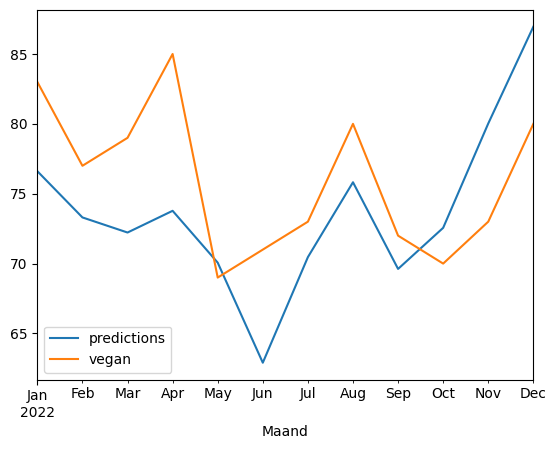

In [24]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['vegan'].plot(legend = True)

In [27]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test["vegan"], predictions)
  
# Calculate mean squared error
#mean_squared_error(test["vegan"], predictions)

5.963760993637086

<AxesSubplot: xlabel='Maand'>

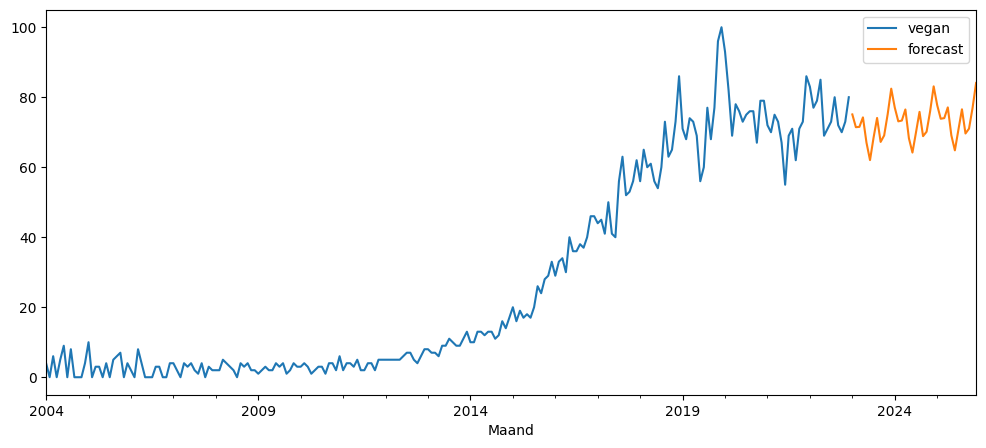

In [26]:
# Train the model on the full dataset
model = model = SARIMAX(trend['vegan'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(trend), 
                          end = (len(trend)-1) + 3 * 12, 
                          typ = 'levels').rename('forecast')
  
# Plot the forecast values
trend['vegan'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)